# O que é o Pandas e para que serve

- Análise de Dados (seja para DataScience, seja para trabalhar de forma integrada com arquivos em Excel e Banco de Dados)
- Melhor biblioteca/módulo para trabalhar com quantidades enormes de informações
- Uma mistura de listas e dicionários de forma muito eficiente

## Resumo

Se você trabalha com muitos dados, você vai precisar usar o pandas

## Forma de usar

In [2]:
from openpyxl import Workbook, load_workbook
from datetime import datetime
import pandas as pd
import requests
import io
from tqdm import tqdm
df = pd.read_csv("Contoso - Vendas - 2017.csv", sep=";")
df.head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1


In [ ]:
df.info()
print(df["ID Cliente"])

In [64]:
lista = ['ID Produto', 'Quantidade Vendida', 'Quantidade Devolvida']
produtos_quantidade = df[lista]
produtos_quantidade

,ID Produto,Quantidade Vendida,Quantidade Devolvida
0,981,9,1
1,1586,9,1
2,1444,13,1
3,1468,6,1
4,1106,4,1
...,...,...,...
980637,2490,120,0
980638,2488,120,0
980639,2511,80,0
980640,436,39,0


In [68]:
cPr = pd.read_csv("Contoso - Cadastro Produtos.csv", sep=";", encoding="latin1")
cLi = pd.read_csv("Contoso - Clientes.csv", sep=";", encoding="latin1")
cLo = pd.read_csv("Contoso - Lojas.csv", sep=";", encoding="latin1")
cPm = pd.read_csv("Contoso - Promocoes.csv", sep=";", encoding="latin1")
cVe = pd.read_csv("Contoso - Vendas - 2017.csv", sep=";", encoding="latin1")
display(cPr)

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econï¿½mico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econï¿½mico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econï¿½mico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econï¿½mico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econï¿½mico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


In [19]:
cliDf = cLi[['ID Cliente', 'E-mail']]
proDf = cPr[['ID Produto', 'Nome do Produto']]
lojDf = cLo[['ID Loja', 'Nome da Loja']]

In [66]:
cVe = cVe.merge(proDf, on='ID Produto')
cVe = cVe.merge(lojDf, on='ID Loja')
cVe = cVe.merge(cliDf, on='ID Cliente')
cVe = cVe.rename(columns={'E-mail': 'E-mail do Cliente'})
display(cVe)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto_x,Nome da Loja_x,E-mail do Cliente,Data,Ano da Venda,Mes da Venda,Dia da Venda,Nome do Produto_y,Nome da Loja_y,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017-01-01,2017,1,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,2,2017-01-01,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com,2017-01-01,2017,1,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com
2,3,2017-01-01,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com,2017-01-01,2017,1,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com
3,4,2017-01-01,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com,2017-01-01,2017,1,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com
4,5,2017-01-01,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com,2017-01-01,2017,1,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,2017-12-31,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu,2017-12-31,2017,12,31,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu
980638,980639,2017-12-31,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com,2017-12-31,2017,12,31,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com
980639,980640,2017-12-31,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org,2017-12-31,2017,12,31,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org
980640,980641,2017-12-31,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com,2017-12-31,2017,12,31,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com


E-mail do Cliente
karen33@adventure-works.com     77
chloe77@adventure-works.com     74
julia43@adventure-works.com     69
josï¿½64@adventure-works.com    68
karen16@adventure-works.com     68
                                ..
hcadwalladergx@slashdot.org      1
ian86@adventure-works.com        1
cvernazza4k@wordpress.com        1
rpeadena0@delicious.com          1
ppitman73@goodreads.com          1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

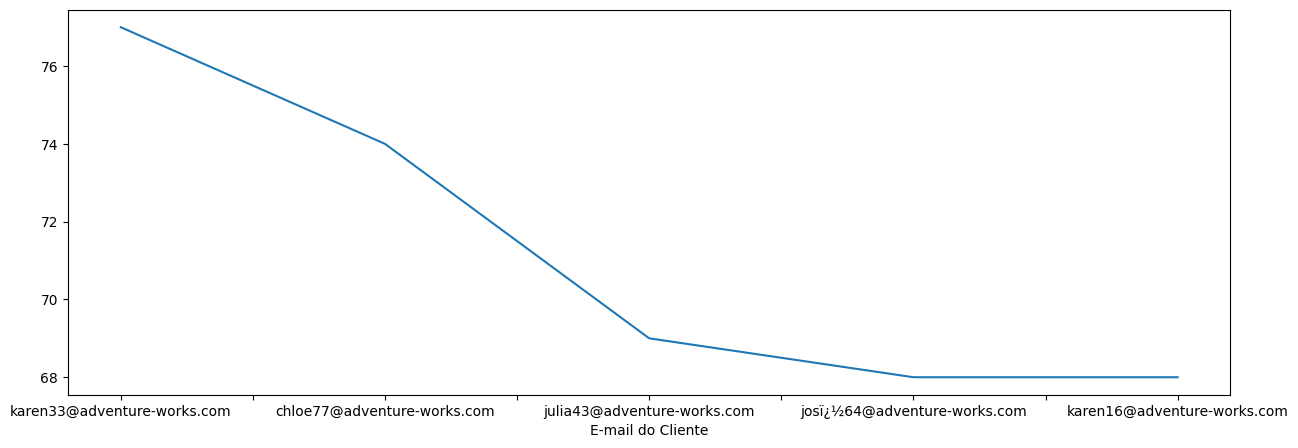

In [21]:
freq = cVe["E-mail do Cliente"].value_counts()
display(freq)
freq[:5].plot(figsize=(15, 5))

In [71]:
cVe = cVe.groupby(by='Nome da Loja').sum()
display(cVe)
cVe = cVe[['Quantidade Vendida']]
display(cVe)


KeyError: 'Nome da Loja'

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
850074,850075,12/11/2017,12/11/2017,0,200,2517,4,21737,1200,0,Contoso In-Line Coupler E180 Silver,Loja Contoso Catalog,carlos9@adventure-works.com
897464,897465,30/11/2017,30/11/2017,0,200,2507,4,17011,960,1,Contoso Rubberized Snap-On Cover Hard Case Cel...,Loja Contoso Catalog,mmorcome@java.com
891965,891966,28/11/2017,28/11/2017,0,200,2489,4,9242,960,0,Contoso Rubberized Skin BlackBerry E100 Silver,Loja Contoso Catalog,amorriarty6r@mashable.com
477705,477706,25/06/2017,25/06/2017,0,307,2502,7,31530,840,0,Contoso Touch Stylus Pen E150 Black,Loja Contoso Asia Online,dale11@adventure-works.com
868544,868545,19/11/2017,26/11/2017,7,200,2515,4,22682,720,0,Contoso In-Line Coupler E180 White,Loja Contoso Catalog,melanie13@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894500,894501,29/11/2017,30/11/2017,1,250,909,10,13831,4,0,SV 80GB USB2.0 Portable Hard Disk E500 Blue,Loja Contoso Athens,ogodbern4@narod.ru
894501,894502,29/11/2017,29/11/2017,0,204,598,10,26077,4,0,Contoso Screen 80in E080 White,Loja Contoso York,todd4@adventure-works.com
894502,894503,29/11/2017,29/11/2017,0,205,1437,10,33621,4,0,The Phone Company Finger Touch Screen Phones M...,Loja Contoso Carlisle,lucas12@adventure-works.com
894503,894504,29/11/2017,01/12/2017,2,246,742,10,24537,4,0,Proseware Photo Inkjet Printer E290 Green,Loja Contoso Berne,rachel57@adventure-works.com


<Axes: >

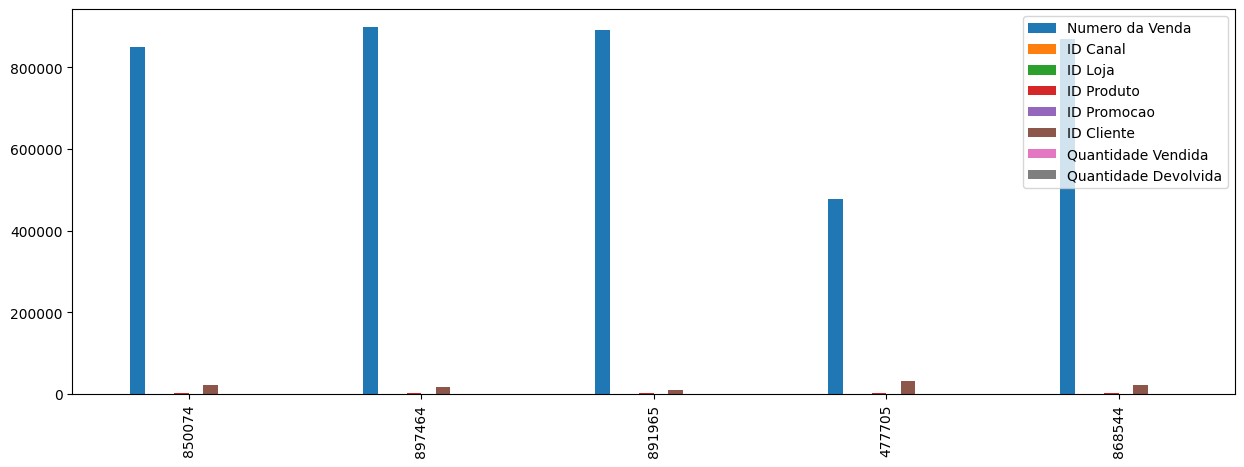

In [27]:
#ordenando o dataframe
vLoj = cVe.sort_values('Quantidade Vendida', ascending = False)
display(vLoj)
cVe.to_csv('Teste.csv')
#podemos plotar em um gráfico
vLoj[:5].plot(figsize=(15, 5), kind='bar')

In [11]:
maiV = cVe['Quantidade Vendida'].max()
melL = cVe['Quantidade Vendida'].idxmax()
print(maiV, melL)

1029117 Loja Contoso Catalog 


In [12]:
minV = cVe['Quantidade Vendida'].min()
pioL = cVe['Quantidade Vendida'].idxmin()
print(minV, melL)

234 Loja Contoso Catalog 


In [23]:
qtd_vendida, qtd_devolvida = cVe['Quantidade Vendida'].sum(), cVe['Quantidade Devolvida'].sum(); print('{:.2%}'.format(qtd_devolvida / qtd_vendida))

1.17%


In [40]:
loj = cVe[cVe["ID Loja"] == 306]
qtd_vendida, qtd_devolvida = loj['Quantidade Vendida'].sum(), loj['Quantidade Devolvida'].sum(); print('{:.2%}'.format(qtd_devolvida / qtd_vendida))

1.45%


### Desafio: e se eu quisesse criar uma tabela apenas com as vendas da Loja Contoso Europe Online e que não tiveram nenhuma devolução. Quero criar essa tabela e saber quantas vendas são.

In [45]:
tab = loj[loj['Quantidade Devolvida'] == 0]
tab.to_csv('EuropeOnlineSemDev.csv')

### Agora, e se quisermos acrescentar uma coluna com o mês, o dia e o ano de cada venda (e não só a data completa)

In [63]:
cVe['Data da Venda'] = pd.to_datetime(cVe['Data da Venda'], format='%d/%m/%Y')
cVe['Ano da Venda'] = cVe['Data da Venda'].dt.year
cVe['Mes da Venda'] = cVe['Data da Venda'].dt.month
cVe['Dia da Venda'] = cVe['Data da Venda'].dt.day
display(cVe)
cVe.info()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente,Data,Ano da Venda,Mes da Venda,Dia da Venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017-01-01,2017,1,1
1,2,2017-01-01,06/01/2017,5,308,1586,2,18469,9,1,SV DVD 55DVD Storage Binder M56 Black,Loja Contoso North America Reseller,cshawd4@technorati.com,2017-01-01,2017,1,1
2,3,2017-01-01,01/01/2017,0,294,1444,5,19730,13,1,"The Phone Company Touch Screen Phones 26-2.2"" ...",Loja Contoso Tehran No.2,kgorriekd@bandcamp.com,2017-01-01,2017,1,1
3,4,2017-01-01,01/01/2017,0,251,1468,5,29326,6,1,Contoso Touch Screen Phones - CRT M11 Black,Loja Contoso Singapore,angela49@adventure-works.com,2017-01-01,2017,1,1
4,5,2017-01-01,07/01/2017,6,94,1106,2,22617,4,1,Contoso SLR Camera M146 Orange,Loja Contoso Grand Prairie,jacob4@adventure-works.com,2017-01-01,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,2017-12-31,31/12/2017,0,194,2490,4,10353,120,0,Contoso Rubberized Skin BlackBerry E100 White,Loja Contoso Ridgely,ocrosson9u@illinois.edu,2017-12-31,2017,12,31
980638,980639,2017-12-31,06/01/2018,6,32,2488,4,31750,120,0,Contoso Rubberized Skin BlackBerry E100 Black,Loja Contoso Milliken,victor11@adventure-works.com,2017-12-31,2017,12,31
980639,980640,2017-12-31,03/01/2018,3,210,2511,10,12003,80,0,Contoso Original K1m Li-Ion Standard Battery E...,Loja Contoso Cheshire,mtopaz4@gmpg.org,2017-12-31,2017,12,31
980640,980641,2017-12-31,31/12/2017,0,53,436,4,25550,39,0,Adventure Works Desktop PC1.80 ED180 White,Loja Contoso East Troy,lance5@adventure-works.com,2017-12-31,2017,12,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Numero da Venda       980642 non-null  int64         
 1   Data da Venda         980642 non-null  datetime64[ns]
 2   Data do Envio         980642 non-null  object        
 3   ID Canal              980642 non-null  int64         
 4   ID Loja               980642 non-null  int64         
 5   ID Produto            980642 non-null  int64         
 6   ID Promocao           980642 non-null  int64         
 7   ID Cliente            980642 non-null  int64         
 8   Quantidade Vendida    980642 non-null  int64         
 9   Quantidade Devolvida  980642 non-null  int64         
 10  Nome do Produto       980642 non-null  object        
 11  Nome da Loja          980642 non-null  object        
 12  E-mail do Cliente     980642 non-null  object        
 13 

In [74]:
nvDf = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';')
nvDf = nvDf.set_index('Nome do Produto')
nvDf.loc['Contoso Optical Wheel OEM PS/2 Mouse E60 Black']
print(nvDf.loc['Contoso Optical Wheel OEM PS/2 Mouse E60 Black', 'Preco Unitario'])
print(nvDf.iloc[2, 5])

13
13


In [75]:
nvDf.loc[nvDf['ID Produto'] == 873, 'Preco Unitario'] = 23
display(nvDf.head())

,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
Nome do Produto,,,,,,,,
Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econ�mico,"10,69",23,873,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econ�mico,"6,63",13,879,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econ�mico,"6,63",13,880,22
Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econ�mico,"6,63",13,881,22
Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econ�mico,"6,63",13,882,22


In [ ]:
nvDf.to_csv('NovoCSV.csv')

In [ ]:
url = 'https://drive.google.com/uc?authuser=0&id=1Ru7s-x3YJuStZK1mqr_qNqiHVvdHUN66&export=download'
cotacao_df = pd.read_csv(url)
display(cotacao_df)

In [ ]:
url = 'https://portalweb.cooxupe.com.br:9080/portal/precohistoricocafe_2.jsp?d-3496238-e=2&6578706f7274=1'
conteudo_url = requests.get(url).content
arquivo = io.StringIO(conteudo_url.decode('latin1'))
cafe_df = pd.read_csv(arquivo, sep=r'\t', engine='python')
display(cafe_df)

In [ ]:
tabela = pd.read_excel("Produtos.xlsx")
display(tabela)

In [ ]:
tabela.loc[tabela["Tipo"]=="Serviço", "Multiplicador Imposto"] = 1.5

tabela["Preço Base Reais"] = tabela["Multiplicador Imposto"] * tabela["Preço Base Original"]

tabela.to_excel("ProdutosPandas.xlsx", index=False)

In [ ]:
planilha = load_workbook("Produtos.xlsx")

aba_ativa = planilha.active

for celula in aba_ativa["C"]:
    if celula.value == "Serviço":
        linha = celula.row
        aba_ativa[f"D{linha}"] = 1.5
        
planilha.save("ProdutosOpenPy.xlsx")

In [84]:
pbar = tqdm(total=len(cVe['ID Loja']), position=0, leave=True)

for i, id_loja in enumerate(cVe['ID Loja']):
    pbar.update()
    if id_loja == 222:
        cVe.loc[i, 'Quantidade Devolvida'] += 1
        
display(cVe)

  0%|          | 0/980642 [00:00<?, ?it/s]

 95%|█████████▍| 928010/980642 [00:02<00:00, 219543.37it/s] 

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


In [3]:
#15
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)
display(funcionarios_df)
display(clientes_df)
display(servicos_df)

funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']
print('Total de folha salarial é de R${:,}'.format(sum(funcionarios_df['Salario Total'])))

faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']])
#display(faturamento_df)
print('Faturamento foi de R${:,}'.format(sum(faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal'])))

qtde_funcionarios_fecharam = len(servicos_df['ID Funcionário'].unique())
qtde_funcionarios_totais = len(funcionarios_df['ID Funcionário'])
print('Percentual foi de {:.2%}'.format(qtde_funcionarios_fecharam / qtde_funcionarios_totais))

contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']])
#display(contratos_area_df)
qtde_contratos_area = contratos_area_df['Area'].value_counts()
print(qtde_contratos_area)
qtde_contratos_area.plot(kind='bar')

qtde_funcionarios_area = funcionarios_df['Area'].value_counts()
print(qtde_funcionarios_area)
qtde_funcionarios_area.plot(kind='bar')

ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('O ticket médio mensal é de R${:,.2f}'.format(ticket_medio))

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [ ]:
#16

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)



In [ ]:
#17

In [ ]:
#18

In [ ]:
#19

In [ ]:
#20

In [ ]:
#21

In [ ]:
#22

In [ ]:
#23
tabela = pd.read_csv("exportacao_full.csv")
tabela = tabela.loc[tabela['Year']>=2016, :]
tabela = tabela.loc[tabela['Country']=="France", :]
display(tabela)

In [ ]:
#24

In [ ]:
#25

In [ ]:
#26